# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
# %pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
# %pip install --upgrade plotly

### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = "{:,.2f}".format

### Load the Data

In [ ]:
df_data = pd.read_csv("mission_launches.csv")

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [ ]:
df_data.head(5)

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [ ]:
df_data.drop(columns=["Unnamed: 0", "Unnamed: 0.1"], inplace=True)
# These two columns are unnecessary 

df_data.head(7)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success


In [ ]:
print("Nan Values:", df_data.isna().values.any())
print("Duplicates:", df_data.duplicated().values.any())

df_data[df_data.isna().values]
# 3360 Rows contain NaN Price values


Nan Values: True
Duplicates: True


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
13,IAI,"Pad 1, Palmachim Airbase, Israel","Mon Jul 06, 2020 01:00 UTC",Shavit-2 | Ofek-16,StatusActive,NaN,Success
28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri May 22, 2020 07:31 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,NaN,Success
31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Tue May 12, 2020 01:16 UTC",Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,StatusActive,NaN,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


## Descriptive Statistics

In [ ]:
print("The number of successful missions are:", len(df_data[df_data["Mission_Status"] == "Success"].values))
print("There are currently", len(df_data[df_data["Rocket_Status"] == "StatusActive"].values), "active rockets")
print(f"There are {df_data.Organisation.nunique()} organisations that have launched rockets")

The number of successful missions are: 3879
There are currently 790 active rockets
There are 56 organisations that have launched rockets


In [ ]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Feb 07, 1990 01:33 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
org_launches = df_data.Organisation.value_counts()

In [ ]:
org_launches_fig = px.pie(org_launches,
                          labels=org_launches.index,
                          values=org_launches.values,
                          title="Space Mission Launches by Organisation",
                          names=org_launches.index,
                          hole=0.2)

org_launches_fig.update_traces(textposition="inside", textfont_size=15, textinfo="label+value")

org_launches_fig.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [ ]:
rocket_status = df_data.Rocket_Status.value_counts()

In [ ]:
rocket_status_fig = px.bar(data_frame = rocket_status, 
                           x=["Retired", "Active"],
                           y=rocket_status.values,
                           text=rocket_status.values,
                           color=rocket_status.values,
                           color_continuous_scale="rdbu_r",
                           title="Active vs Retired Rocket Status")

rocket_status_fig.update_layout(xaxis_title="Current Status",
                  yaxis_title="Number of Rockets",
                  xaxis={"categoryorder":"max ascending"},
                  coloraxis_showscale=False,)

rocket_status_fig.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
mission_status = df_data.Mission_Status.value_counts()

In [ ]:
mission_status_fig = px.pie(mission_status,
                            labels=mission_status.index,
                            values=mission_status.values,
                            names=mission_status.index,
                            color=mission_status.values,
                            title="Percent of Successful Misssions")

mission_status_fig.update_traces(textposition="outside", 
                                 textfont_size=15, 
                                 textinfo="percent+label",
                                 pull=[0.1, 0.1, 0.1, 0])
                                 

mission_status_fig.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4114: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [ ]:
launch_prices = df_data.Price.dropna().astype(str).str.replace(",", "")
launch_prices = pd.to_numeric(launch_prices)

print(launch_prices.sample(5))

print("There are", launch_prices[launch_prices > 1000].count(), "rocket launches that cost more than $1 billion.")
# We will be excluding these values from our histogram as the previous value is $450 million



110    29.15
698    41.80
787    90.00
618   109.00
993   190.00
Name: Price, dtype: float64
There are 15 rocket launches that cost more than $1 billion.


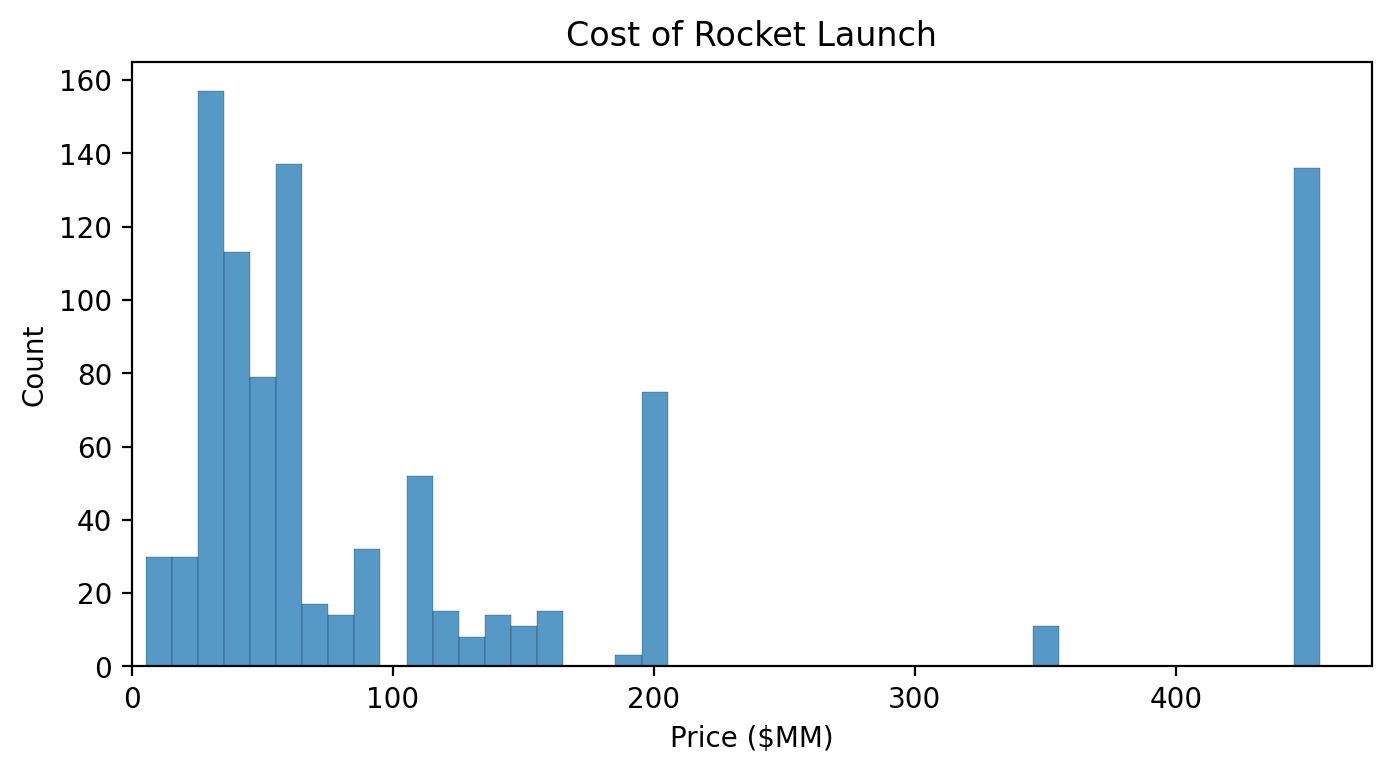

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)

sns.histplot(data=launch_prices,
             x=launch_prices.values,
             binwidth=10)

plt.xlabel("Price ($MM)")
plt.xlim(0,475)
plt.title("Cost of Rocket Launch")

plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
# Here we create a country column by splitting the location and taking the last item,
# this isolates the country and then we strip to remove any spaces
df_data["Country"] = df_data["Location"].apply(lambda x: x.split(",")[-1].strip())
print(df_data.sample(10))

names_to_change = {"Russia": "Russian Federation", "New Mexico": "USA", 
                   "Yellow Sea": "China", "Shahrud Missile Test Site": "Iran, Islamic Republic of",
                   "Iran": "Iran, Islamic Republic of",
                   "Pacific Missile Range Facility": "USA",
                   "Barents Sea": "Russian Federation", "Gran Canaria": "USA",
                   "North Korea": "Korea, Democratic People's Republic of",
                   "South Korea": "Korea, Republic of", 
                   "Pacific Ocean": "USA"}

df_data.Country.replace(names_to_change, inplace=True)

# Converting Countries into their alpha-3 values, e.g. South Korea -> KOR
df_data["Country_Code"] = df_data["Country"].apply(lambda x: (countries.get(x).alpha3))

     Organisation  ...        Country
710        VKS RF  ...         Russia
1318  Arianespace  ...         France
1749    RVSN USSR  ...         Russia
1522       VKS RF  ...         Russia
3252    RVSN USSR  ...         Russia
3649    RVSN USSR  ...         Russia
1885    RVSN USSR  ...         Russia
1026   Sea Launch  ...  Pacific Ocean
292        SpaceX  ...            USA
944      Eurockot  ...         Russia

[10 rows x 8 columns]


In [ ]:
launch_by_count = df_data.groupby(["Country_Code", "Country"], as_index=False).agg({"Mission_Status": pd.Series.count})
launch_by_count.rename(columns={"Mission_Status": "Total_Launches"}, inplace=True)

# print(launch_by_count)

rocket_launch_fig = px.choropleth(launch_by_count, 
                                  locations="Country_Code",
                                  color="Total_Launches",
                                  color_continuous_scale="bluyl",
                                  title="Rocket Launches By Country",
                                  hover_name="Country",)

rocket_launch_fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
# Create a df that holds all unsuccessful missions
mission_failures = df_data[df_data.Mission_Status != "Success"]
mission_failures.describe()

failures_by_count = mission_failures.groupby(["Country_Code", "Country"], as_index=False).agg({"Mission_Status": pd.Series.count})
failures_by_count.rename(columns={"Mission_Status": "Total_Failures"}, inplace=True)
failures_by_count


,Country_Code,Country,Total_Failures
0,AUS,Australia,3
1,BRA,Brazil,3
2,CHN,China,25
3,FRA,France,18
4,IND,India,13
5,IRN,"Iran, Islamic Republic of",9
6,ISR,Israel,2
7,JPN,Japan,13
8,KAZ,Kazakhstan,93
9,KOR,"Korea, Republic of",2


In [ ]:
rocket_failures_fig = px.choropleth(failures_by_count, 
                                    locations="Country_Code",
                                    color="Total_Failures",
                                    color_continuous_scale="bluyl",
                                    title="Rocket Failures By Country",
                                    hover_name="Country",)

rocket_failures_fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [ ]:
burst = px.sunburst(df_data, 
                    path=["Country", "Organisation", "Mission_Status"],
                    title="Rocket Launches by Countries, Orgs, and Mission Status")

burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
# Removes any "," from the "Price" column
# We then convert "Price" into a float, we coerce the errors to keep the NaN values and not drop them.
df_data.Price = df_data.Price.apply(lambda x: str(x).replace(",", ""))
df_data.Price = pd.to_numeric(df_data.Price, errors='coerce')


total_spent_by_org = df_data.groupby("Organisation").agg({"Price": "sum"})

# This only shows the companies that have listed rocket launch costs
total_spent_by_org = total_spent_by_org[total_spent_by_org.Price > 0]

total_spent_by_org = total_spent_by_org.Price.sort_values(ascending=True)
total_spent_by_org

Organisation
Virgin Orbit          12.00
Sandia                15.00
EER                   20.00
ExPace                28.30
ESA                   37.00
Rocket Lab            97.50
JAXA                 168.00
Lockheed             280.00
Eurockot             543.40
Kosmotras            638.00
Martin Marietta      721.40
Roscosmos          1,187.50
Boeing             1,241.00
ILS                1,320.00
VKS RF             1,548.90
US Air Force       1,550.92
ISRO               2,177.00
MHI                3,532.50
Northrop           3,930.00
SpaceX             5,444.00
CASC               6,340.26
RVSN USSR         10,000.00
ULA               14,798.00
Arianespace       16,345.00
NASA              76,280.00
Name: Price, dtype: float64

In [ ]:
total_spent_bar = px.bar(total_spent_by_org,
                         x=total_spent_by_org.values,
                         orientation='h',
                         color=total_spent_by_org,
                         color_continuous_scale=px.colors.sequential.matter,
                         title="Total Amount Spent on Space Missions",)

total_spent_bar.update_layout(xaxis_title="Price (in $ Millions)",
                              coloraxis_showscale=False,)

total_spent_bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

# Chart the Number of Launches per Year

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 